In [1]:
import pandas as pd
import re
import spacy
import requests

In [ ]:
#

In [2]:
diabetes_text = """סוכרת נגרמת מירידה בכמות האינסולין שמיוצר בגוף או עקב ירידה ביכולת הגוף להשתמש באינסולין.

מה זה אינסולין?
אינסולין הוא הורמון חשוב ביותר שמופרש מתאי בטא בלבלב, ותפקידו לעזור לסוכר (גלוקוזה) המצוי בדם להיכנס לתוך התאים. הגלוקוזה חיונית לתאים בשל היותה חומר הגלם העיקרי ליצירת אנרגיה.

מה קורה כשאין לנו מספיק אינסולין בגוף?
כאשר קיים מחסור באינסולין, או שתאי הגוף אינם מצליחים לנצל את האינסולין, נוצר מצב שבו רמת הסוכר בדם גבוהה מדי, אך רמת הסוכר בתאים נמוכה. הכליות מפנות את עודפי הסוכר מהדם, ואילו התאים נותרים ללא חומר הגלם החיוני לתפקודם התקין.

מהן הסיבות להופעת הסוכרת?
הסיבות להופעת הסוכרת אינן ידועות עד היום, אף שמדובר במחלה נפוצה מאוד שחוקרים רבים עמלים על פיצוח סודותיה. מניחים שישנם גורמים רבים המשפיעים על הופעת המחלה ובהן: תורשה, תזונה לקויה, תגובה של מערכת החיסון ומחלות נגיפיות.

מה ההבדל בין הסוגים השונים של הסוכרת?
יש כמה סוגים של סוכרת. אלה הם הנפוצים ביותר:

 סוכרת נעורים, הנקראת גם סוכרת מסוג 1 או סוכרת תלוית אינסולין.

 סוכרת מבוגרים, הנקראת גם סוכרת סוג 2 או סוכרת שאינה תלויה באינסולין.

 סוכרת הריונית.

מהי סוכרת נעורים?
סוכרת נעורים מופיעה בדרך כלל לפני גיל 30, והסובלים ממנה חייבים לקבל טיפול באינסולין. החוקרים מניחים שהגורם למחלה הוא הפרעה במערכת החיסון, שמסיבות לא ברורות פועלת נגד תאי הלבלב המייצרים את האינסולין והורסת אותם. לכן ישנה ירידה בכמות האינסולין המופרשת - עד כדי היעדר מוחלט של אינסולין מייצור עצמי של הגוף.

סוכרת נעורים מופיעה בדרך כלל בפתאומיות, לעיתים קרובות אחרי שהילד או הצעיר סבלו ממחלה נגיפית כלשהי. זו יכולה להיות אפילו מחלה קלה שמחוללת שינוי בדפוס הפעולה של מנגנון החיסון בגוף. 

מהם הגורמים לסוכרת נעורים?

מהם גורמי הסיכון? 

מהו ההבדל בין סוכרת נעורים לסוכרת מבוגרים?
סוכרת של מבוגרים (סוכרת מסוג 2) מופיעה בדרך כלל בגיל מאוחר הרבה יותר, לעיתים קרובות  אצל אנשים שסובלים מעודף משקל. חולים בסוכרת מבוגרים יכולים להסתדר בדרך כלל רק בעזרת דיאטה מתאימה או בעזרת שילוב של דיאטה ושל כדורים, ללא צורך בנטילת אינסולין, לפחות בשנים הראשונות אחרי גילוי מחלתם. בקרב חולים בסוכרת מבוגרים הבעיה לא נובעת ממחסור באינסולין אלא מכך שנוצרת תנגודת לפעילות של האינסולין, והוא אינו מצליח להכניס את הסוכר מהדם לתאים. זאת בניגוד להפרעה בייצור האינסולין שמאפיינת את סוכרת הנעורים.

מהם התסמינים של סוכרת נעורים?
התסמינים רבים וכוללים, בין היתר:

 צמא מוגבר

 מתן שתן רב

 איבוד משקל

 עלייה בתיאבון

 עייפות

 בחילות

 ראייה מטושטשת .

האם סוכרת נעורים היא מחלה מסוכנת?
עד לגילוי האינסולין (על ידי שני חוקרים קנדים: חתן פרס נובל ד"ר פרדריק בנטינג ושותפו למחקר ד"ר צ'רלס בסט) מי שחלה בסוכרת נעורים היה מת בתוך זמן לא רב לאחר גילוי המחלה. כיום, כשהטיפול באינסולין הוא מתקדם מאוד, יכולים החולים ליהנות מתוחלת חיים ממושכת.

אם לא מטפלים במחלת הסוכרת, היא עלולה לגרום לסיבוכים ארוכי טווח כמו:

 פגיעות בכלי דם (לדוגמה, טרשת עורקים מואצת שעלולה לגרום בעתיד לבעיות לב)

 פגיעה בעיניים באזור הרשתית שבשלב הסופי שלה עלולה לגרום לעיוורון

 .פגיעה חמורה בכליות עד אי־ספיקת כליות

 פגיעה בתחושה העצבית שעלולה להביא לפגיעות טראומטיות - בעיקר בכפות הרגליים בשל חוסר תחושה.

 עלייה בשכיחות הזיהומים ובקושי רב יותר לרפאם - בשל הפגיעה בפעילותה של מערכת החיסון.

כמה זמן נמשכת המחלה?
עד כמה היא שכיחה?
איך מאבחנים סוכרת נעורים?
כאשר עולה חשד לסוכרת נעורים, יש לעבור סדרה ארוכה של בדיקות מעבדה. הבדיקה הבסיסית ביותר היא של רמת הגלוקוזה בדם בצום. ערך גלוקוזה (סוכר) של 126 מ"ג ומעלה בשתי בדיקות דם רצופות מאשש את האבחנה.

בדיקות מעבדה חשובות נוספות: בדיקת שתן לבדיקת רמת הגלוקוזה ותפקודי הכליות ובדיקת רמת ההמוגלובין הקשור לסוכר (HbA1C). בדיקת HbA1C משמשת מדד טוב של איזון הסוכרת בשלושת החודשים שקדמו לבדיקה ומשמשת כיום הבדיקה העיקרית לאיזון ולמעקב אחר המחלה. 

איך מטפלים בסוכרת נעורים?
למניעת הסיבוכים המאוחרים של מחלת הסוכרת חשוב מאוד לשמור על רמה תקינה של גלוקוזה בדם. איזון רמות הסוכר הוא הדרך הטובה ביותר למניעת הסיבוכים האלה. מטרת הטיפול היא להפחית ככל הניתן את רמת ההמוגלובין הקשור לסוכר (HbA1C) ולשמור על רמת גלוקוזה שקרובה ככל האפשר למדד המקובל. לצורך זה לומדים הסוכרתיים לבדוק בעצמם את רמת הסוכר בדמם. הטיפול בסוכרת מותאם אישית לכל חולה.

נוסף על הטיפול התרופתי יש להקפיד על תזונה נכונה, וחשוב להתייעץ עם דיאטנית לקביעת הדיאטה המתאימה. חשוב להקפיד על גודל הארוחות ועל זמן הארוחות כדי למנוע חוסר התאמה בינן לבין זריקות האינסולין. פעילות גופנית סדירה יכולה לעזור גם היא בשמירה על רמת סוכר תקינה ולמנוע סיבוכים מאוחרים.

ומה בנוגע לזריקות אינסולין?
בטיפול היומיומי נזקקים בדרך כלל החולים בסוכרת נעורים לזריקות אינסולין. הזרקת האינסולין נעשית על ידי החולה עצמו באחת הגפיים ובבטן באמצעות מזרק חד־פעמי או באמצעות עט אינסולין רב־שימושי. מטרת הטיפול באינסולין היא להפחית את רמת הגלוקוזה הגבוהה בדם המופיעה בעיקר אחרי ארוחות. כמות הזריקות ותזמונן במהלך היום תלויים בסוכרתי עצמו ובתגובה שלו לטיפול, וזאת בכפוף להחלטת הרופא ועל סמך בקרה צמודה של רמות הסוכר בדם.

האם הטיפול באינסולין כרוך בתופעות לוואי?
הטיפול באינסולין טומן בחובו סיכונים. הבעיה העיקרית היא הירידה החדה ברמת הסוכר בדם בעקבות מנה גבוהה מדי של אינסולין (יחסית לכמות המזון). התופעה הזאת נקראת היפוגליקמיה והיא יכולה להתרחש בעקבות מתן מנה גדולה מדי של אינסולין או בעקבות דילוג על ארוחה ולעיתים אף ללא סיבה ברורה.

צריך ללמוד לזהות סימנים להתקף היפוגליקמיה - הזעה, רעב, כאבי ראש, בחילות או בלבול - ולטפל בהם באמצעות מזון או משקה עשיר בסוכר. אם ההתקף קשה, ניתן לטפל בו גם באמצעות הזרקה של הורמון הקרוי גלוקגון הגורם לעלייה חדה ברמת הסוכר בדם. לכן חשוב שכל חולה סוכרת שמטופל באינסולין יישא עימו משהו מתוק ואפילו מזרק גלוקגון להזרקה לשריר הירך, בדומה למזרקים האוטומטיים שמצויים בערכות האב"ך.

מה זה קטואצידוזיס?
זו בעיה חריפה נוספת שנפוצה במיוחד בקרב חולים בסוכרת נעורים. קטואצידוזיס נגרם ממחסור חמור באינסולין וגורם לרמה גבוהה של גלוקוזה בדם וליצירת חומר הקרוי "גופי קטו". החומר הזה מסכן את הגוף אם הוא מגיע לרמות גבוהות בדם.

הסיבה לקטואצידוזיס היא חוסר במנת אינסולין, מחלה זיהומית או טראומה. סימני האירוע הם מתן שתן רב, בחילות, הקאות וכאבי בטן, בעיקר בילדים, סימני התייבשות ונשימות מהירות. ללא טיפול הולם עלול מצבו של החולה להידרדר לאובדן הכרה.

הטיפול בקטואצידוזיס כולל מתן נוזלים רבים ומתן אינסולין כדי להוריד את השיעור הגבוה של הסוכר ושל גופי הקטו שנוצרו. הניטור הצמוד במקרים האלה הוא חשוב ביותר כדי למנוע מעבר למצב של היפוגליקמיה (תת סוכר בדם) בעקבות עודף האינסולין שניתן כדי לבלום את ההידרדרות במצב החולה."""

In [3]:
children_text = """הורים יקרים,
במדריך הזה מפורט התהליך העומד בפניכם לאחר שרופא הילדים שאליו פניתם הפנה את בקשתכם לבדיקת הוועדה המקצועית שפועלת בתחום של התפתחות הילד. הפנייה לוועדה המקצועית צריכה לכלול מכתב מהרופא המטפל וכן שאלונים מפורטים שאותם התבקשתם למלא. השאלונים יאפשרו לוועדה להתרשם מצורכי הילד, לזהות את קשייו ולהגדיר את ההתייחסות הנדרשת. מרגע שליחת ההפניה אתם נמצאים בתהליך הבירור.

אם טרם מילאתם את השאלונים, תוכלו להוריד אותם כאן:

צוות המומחים של הוועדה כולל אנשי מקצוע מכל התחומים שקשורים להתפתחות הילד: רפואה, פסיכולוגיה, עבודה סוציאלית, פיזיותרפיה, ריפוי בעיסוק וקלינאות תקשורת. אנשי המקצוע האלה יבדקו ביסודיות את החומר שהוגש.

אם הוועדה תגיע למסקנה שקיים צורך באבחון, אנחנו בכללית נעשה את מרב המאמצים כדי שהתהליך האדמיניסטרטיבי יהיה מהיר וממוקד ושהתהליך הטיפולי יהיה איכותי ויעיל.

אם קיבלתם הודעה שיש צורך באבחון, תנותבו לאיש המקצוע או לאנשי המקצוע המתאימים (את המידע על כך תקבלו ממזכירוּת המרפאה שלכם). הילד יוזמן לאבחונים שמיועדים לקבוע את תחומי החוזקה והקושי שלו ולהתאים תוכנית טיפול לצרכיו.

אם קיבלתם הודעה מהוועדה שאין צורך באבחון, קיבלתם בעצם בשורה משמחת ומרגיעה. עם זאת מומלץ, כמובן, שתמשיכו לעקוב בקפידה אחרי התפתחות הילד. אם לאחר זמן מה תראו שאין שיפור - תוכלו לחזור שנית לרופא המטפל כדי לשקול את הצורך בהפניה חוזרת. מהניסיון ידוע שפעמים רבות הדברים פשוט מסתדרים מעצמם.

חשוב שתדעו כי מתחת למטרייה שנקראת "קשיים בהתפתחות הילד" מצוי ספקטרום נרחב של מצבים. מהניסיון המצטבר ידוע שכ־10% מהילדים מפגינים קשיים שונים בהתפתחותם, אך רק אצל חלקם מאובחן קושי משמעותי וכרוני.

לעיתים נדמה להורים שהילד אינו מתפתח כראוי (כמו "הבן של השכנים") ושקיים קושי התפתחותי, לעיתים הגננת היא שמצביעה על קושי של הילד או הסבתא מציינת ש"האח הגדול כבר זחל/עמד/דיבר... בגיל הזה", ובאופן טבעי ההורים נכנסים לחרדה ומגיעים לרופא.

חשוב, כמובן, להיות ערניים, אך יחד עם זאת יש לזכור שלא כל קושי של הילד הוא אכן בעיה בהתפתחות. לעיתים קרובות מדובר רק בעיכוב קל הנובע מכך שלכל ילד יש קצב התפתחותי משלו.

מהי מטרת הטיפולים בהתפתחות הילד?
במסגרת הטיפול ההתפתחותי מתייחסים לפוטנציאל של הילד אל מול הקושי שלו להשיג אותו ולממש אותו. במהלך הטיפול מתרגלים מיומנויות בתחומים כמו שפה, דיבור, חשיבה, תנועה, משחק וקשר. כמו בכל סוג של למידה מוכרחים ליישם ולתרגל בבית את מה שנלמד בטיפולים כדי להשיג תוצאות. לכם, ההורים, יש תפקיד מרכזי בתרגול הזה, ושיתוף הפעולה שלכם הוא קריטי.

הטיפול הוא תהליך. מטרתו לקדם את הילד, לשפר את יכולותיו ולהעניק לו ארגז כלים להמשך הדרך. יש לזכור שמיומנויות רבות נרכשות עם הגיל, ולכן יש סדר בטיפול. לא מקדימים את המאוחר.

מסגרת טיפולית קבועה, שבה כולם משתפים פעולה - הילד, הוריו, המטפלים המקצועיים ולעיתים גורמים נוספים - עשויה להביא לשינויים משמעותיים מאוד בתפקוד הילד.

כדי להקל עליכם ולסייע לכם ריכזנו כאן בעבורכם מידע על המערך העוסק בהתפתחות הילד בכללית, על זכאותכם בסל הבריאות ובכללית מושלם ועל כל מה שחשוב שתדעו בשלב הזה כדי להתחיל את תהליך הטיפול בילדכם.

אנחנו מאמינים שחובתנו וזכותנו לעמוד לצדכם ולסייע לכם ככל יכולתנו. לכל שאלה, בקשה או צורך במידע נוסף אנו עומדים לרשותכם במרכז שירות הלקוחות שלנו ב־2700* מכל טלפון או כאן באתר האינטרנט.

טיפול התפתחותי לילד - התהליך המלא
 עם הגעתכם לרופא הילדים (בעקבות המלצה של גורם מקצועי או בשל חששות שהתעוררו אצלכם), יבחן הרופא את השאלונים שבידיכם, יקשיב לבקשתכם ויחליט אם להפנות את הילד לאבחון. אם ההחלטה תהיה חיובית, יעביר משרד המרפאה את המסמכים הבאים לוועדת המומחים להתפתחות הילד: חוות הדעת של הרופא, סיכום הממצאים שלו, השאלונים.

 לעיתים עשוי הרופא להפנות את הילד לבדיקות שמיעה וראייה לפני שהוא מפנה אותו לוועדה.

 צוות הוועדה שמקבל את החומר יבדוק את הבקשה ויחליט על בסיס החומר הרפואי ועל סמך חוות הדעת המקצועיות שקיבל אם יש צורך באבחון ובטיפול. על פי ההנחיות של משרד הבריאות, זמן ההמתנה ממסירת השאלונים ועד לרגע שבו מתחילים את תוכנית הטיפול אסור שיעלה על 3 חודשים (חודשיים בעבור פגים).

 אם הוועדה תחליט שיש צורך באבחון ו/או בטיפול, יישלח מסרון לטלפון הנייד של אחד ההורים (אם השירות הזה ניתן במחוז שאליו אתם משתייכים). בחלק מהמחוזות תישלח גם הודעה בדואר. לאחר קבלת ההודעה בנוגע לצורך באבחון ו/או בטיפול יש לפנות למשרד המרפאה כדי לברר על איזה מסלול אבחון וטיפול מבין שני המסלולים הקיימים המליצה הוועדה:

 אבחון/טיפול בתחום אחד (או יותר). במקרה כזה מטפל מהתחום הרלוונטי יזמן את ההורים ואת הילד לאבחון ויקבע לילד תוכנית טיפולים אישית.

 אבחון/טיפול רב־תחומי (משולב). במקרה כזה יוזמנו ההורים והילד לאבחון רב־תחומי ולקביעת תוכנית טיפולים אישית שתתואם בין הגורמים המטפלים.

אם הוועדה תחליט שאין צורך באבחון/טיפול או אם הילד עבר אבחון בתחום המבוקש בשנה האחרונה (מתאריך יום ההולדת שלו) ואינו זכאי לאבחון נוסף על פי סל הבריאות, תתקבל במשרד המרפאה תשובה מנומקת, והיא תועבר להורה."""

In [4]:
old_travel_text = """ האם אנחנו "זקנים מדי" כדי לנסוע?
האמת שלא.

ברוב מדינות המערב וגם בישראל שיעורם של בני הגיל השלישי באוכלוסיה נמצא בעלייה מתמדת. מתוכם, מהווים בני השמונים ומעלה את קבוצת הגיל הגדלה במהירות הרבה ביותר. השיפור במצב הבריאותי של בני גילאים אלה, והעלייה בהכנסה הפנויה, למי שקרנות הנאמנות שלהם לא נמחקו בשנה האחרונה, מאפשרים לרבים לממש תוכניות וחלומות ישנים – גם לנסוע ליעדים שבעבר לא נמנו על היעדים הקלאסיים של הנוסעים מעל גיל 65.

אין בנמצא סטטיסטיקות ישראליות העוסקות במטיילים המבוגרים, אך במרפאות המטיילים של הכללית לא נדיר לפגוש נוסעים בני מעל 80, ולפעמים מעל 90, שיעדם ארצות־הברית או המזרח. תאילנד עצמה מדווחת כי מתוך אוכלוסיית התרמילאים הפוקדת אותה כיום, 15% הם מעל לגיל 55 (בהשוואה לשיעור זניח של בני הגילאים האלה לפני עשר שנים).

חרף העובדה הידועה, כי אנשים בכל הגילאים נוטים להעריך את גילם הסובייקטיבי כצעיר מזה הכרונולוגי (פער ההולך ומתעצם עם ההזדקנות), הרי שלמטיילים המבוגרים יותר מאפיינים בריאותיים מיוחדים, שאסור להתעלם מהם. השילוב בין השינויים הגופניים המלווים את העלייה בגיל לבין מחלות כרוניות, ששיעורן הולך ועולה עם הגיל, מוביל לירידה בתפקודים השונים וכך גם בסיבולת הלב־ריאה, בתגובתיות פחותה לירידה במתח החמצן (היפוקסיה), לירידה בתפקוד הכלייתי ולירידה ביכולת לשמר נוזלים.

בנוסף לאלה, הירידה - הטבעית עם הגיל - בהפרשת חומצות הקיבה כרוכה ברגישות גבוהה יותר לזיהומי מעיים ממגוון של מחוללים. ואם לא די בכך, הירידה בפעילות מערכת החיסון מכרסמת בתגובת הגוף לחיסונים הניתנים לפני הנסיעה וניכרת גם ירידה בתפקודים הנוירולוגיים – קושי לשנן ולזכור וירידה בחדות הראייה והשמיעה – מה שעלול להאט את ההסתגלות של המטיילים לסביבתם החדשה.

תהליכים אלה עלולים לגרום לתחושת־בלבול ולעלייה במפלס החרדה אצל המטיילים מבוגרים, אך ניתן בהחלט לפעול לצמצומן באמצעות הכנה מתאימה לפני הטיול.

  איך נערכים נכון לנסיעה?
מטיילים מעל גיל 60 (ומומלץ גם מעל גיל 50...) טוב יעשו אם יפנו לייעוץ מסודר במרפאת מטיילים של הכללית לפחות ארבעה עד שישה שבועות טרם הנסיעה.

לייעוץ זה חשוב להביא מכתב מרופא או מרופאת המשפחה, או מהרופא או הרופאה המטפלים במחלות רקע שונות - ובו פירוט מלא של האבחנות הכרוניות השונות ושל התרופות הקבועות.

בייעוץ כזה יובאו בחשבון המסלול, משך הטיול, אופיו, ההיסטוריה הרפואית האישית, התרופות הקבועות שאותן נוטלים, אלרגיות שונות שמהן סובלים, המצב החיסוני – וכל המשתנים הרלוונטיים.

אלה - בשילוב עם הסיכונים הספציפיים בארצות היעד - מאפשרים "לתפור" בעבור כל מטיילת ומטייל את ההמלצות הספציפיות על החיסונים הנדרשים, התרופות שיש להביא מהארץ והדרך המיטבית להתנהל, מבחינה בריאותית, לפני הנסיעה, במהלך הנסיעה ואחרי הנסיעה.

יש להביא בחשבון, כי בנסיבות מסוימות, ובהתחשב במצב הבריאותי, הרופאים עשויים להמליץ גם לבצע שינוי מהותי במסלול, או אף לדחות את הנסיעה.

 כמה מילים מרגיעות (בדרך כלל...)
על אף הסיכונים הבריאותיים המיוחדים לעולם השלישי, הרי שסיבת התמותה המובילה בקרב המטיילים היא, עדיין, מחלות־לב וכלי דם – כלומר: התקפי־לב ואירועים מוחיים. אחרי אלה ניתן למנות פציעות בתאונות שונות (ולכן, למשל, חשוב שיהיה ביטוח טוב) - ורק לבסוף מגיע תורן של המחלות הזיהומיות, המאפיינות את ארצות היעד.

  מה חשוב לקחת לחו"ל?
 מכתב באנגלית מהרופא או הרופאה המטפלים ובו ציון של כל המחלות הכרוניות שמהן סובלים.

 על המכתב לכלול בצורה ברורה רשימה של כל הפעולות הרפואיות שבוצעו בעבר - צנתור, ניתוח מעקפים, החלפת מפרקים וכיוצא באלה).

 במכתב צריכה להימצא רשימת כל התרופות הקבועות שנוטלים. הרשימה צריכה לכלול גם שמות גנריים של התרופות, לא רק שמות מסחריים, כך שהתרופות תהיינה קלות לזיהוי בכל מקום בעולם.

 מומלץ להצטייד גם בתרשימים רפואיים העלולים להיות רלוונטיים, דוגמת תרשים א.ק.ג עדכני אם סובלים ממחלת־לב – ודרכי התקשרות (טלפון, טלפון נייד, פקס, דואר אלקטרוני) של הרופא או הרופאה הקרדיולוגים המטפלים בכם בארץ.

 תרופות מרשם יש לקחת באריזות המקוריות ולא במיכלים אחרים. את התרופות יש לקחת בתיק האישי, ולא במזוודה המאופסנת בבטן המטוס. הסיבה פשוטה: תכשירים רבים רגישים לשינויים קיצוניים בטמפרטורה (למשל, אינסולין), ופעמים רבות מידות החום והקור בתא המטען אינן מבוקרות.

 כדאי שהתרופות שעימן נוסעים יהיו תואמות את הכתוב במכתב הרפואי – בייחוד נכון הדבר לגבי תרופות הניתנות בהזרקה ותרופות משככות כאבים ממשפחת הנרקוטיקה, למשל אוקסיקוד (Oxycod, Oxycodone), או אמ סי אר (MCR, Morphine)

 ביטוח ביטוח ביטוח
ביטוח נסיעות לחו"ל בכללית חו"ל מאפשר כיסוי לבעיות בריאות ולמחלות קיימות וכרוניות, אם נהנית מתקופת בריאות יציבה בחצי השנה שלפני הטיול בחו"ל.

 נוסעים עם סוכרת
תרופות וציוד: מטיילים חולי סוכרת צריכים להעריך את כמות האינסולין, המזרקים/העטים, הפדים, האלכוהול ואמצעי הניטור שבה הם משתמשים – ולקחת עימם לטיול כמות מספקת, במידה שלא יודעים אם ניתן לרכוש תרופות וציוד ממקורות מהימנים (למשל, אם מתכננים טרקים, טיולי שטח, טיפוס הרים או אפילו טיול רכב באזורים כפריים המרוחקים ממרכזי הערים הגדולות). ניתן - וכדאי - להצטייד בצמיד לנשיאה על היד, המכיל בתוכו מידע רלוונטי על המחלה.

בטיול ממושך, הסכנה העיקרית היא דווקא אירועים של היפוגליקמיה (ירידה ברמת הסוכר) בשל שינוי בהרגלי האכילה ובסדר היום. לכן יש להצטייד גם בטבליות או בג'ל גלוקוז, או בזריקות גלוקגון, לפי המלצת הרופא או הרופאה המטפלים. חולי סוכרת החוצים יותר מארבעה אזורי זמן בכיוון מערב עשויים להזדקק למינונים גבוהים יותר של אינסולין (כיוון שהיממה מתארכת), בעוד שאלה הנוסעים מזרחה עשויים להזדקק להפחתה במינון (כיוון שהיממה מתקצרת). השימוש באינסולין קצר־טווח ביחד עם הארוחות מסייע מאוד בהקשר זה. אין גם מה להתבייש! שווה שהשותפים לטיול יידעו שיש לך סוכרת - וגם כיצד ניתן לעזור לך בשעת הצורך.

בריאות הרגליים: חשוב שמטיילים סוכרתיים יצטיידו בנעליים מתאימות וידאגו להיגיינה מתאימה של כפות הרגליים, כדי למנוע התהוות של פצעים וכיבים כרוניים.

בכל מקרה, אם נוסעים עם סוכרת מומלץ להתייעץ הן עם הרופא או הרופאה במרפאת־המטיילים והן עם הרופא או הרופאה המבצעים את המעקב אחר הסוכרת ולגבש תוכנית פעולה ברורה למקרה שיופיעו סיבוכים (למשל: שמות וכתובות מדויקים של מרפאות או בתי־חולים אמינים ביעדים השונים וכיצד בדיוק מגיעים אליהם).

חשוב לדעת: רק ביטוח נסיעות נסיעות בכללית חו"ל מאפשר כיסוי לבעיות בריאות ולמחלות קיימות וכרוניות, אם נהנית מתקופת בריאות יציבה בחצי השנה שלפני הטיול בחו"ל.

 נוסעים עם אסתמה
ציוד ותרופות: מטיילים הסובלים מאסתמה צריכים להצטייד במלאי מתאים של תרופות, הן תרופות קבועות (משאפים למיניהם) והן תרופות לטיפול בהחמרה פתאומית במחלה (תכשירי סטרואידים). חולי אסתמה רבים מכירים את "האופי" של מחלתם, יודעים ממה להימנע, מה הם הסימנים המוקדמים של התקף – ושווה שלא ינסו לבצע פעילויות העלולות להיות מסוכנות בשבילם, או, לחילופין, יגיבו נכון בשלב מוקדם של הופעת התסמינים.

אין גם מה להתבייש! שווה שהשותפים לטיול יידעו שיש לך אסתמה - וגם כיצד ניתן לעזור לך בשעת הצורך.

בטיול ממושך, הסכנה העיקרית לחולי אסתמה היא יציאה מאיזון והופעת התקפים. הגורמים יכולים להיות רבים, ובעיקר השינויים באופי המאמץ הגופני, במעלות החום, בלחות האוויר ובאלרגנים שבסביבה. בטרקים ובטיולי שטח באזורים מרוחקים נוסף גם הסיכון של חוסר הזמינות של עזרה רפואית ממוסדת, בתי־חולים ומרפאות, ברמה שאליה רגילים בישראל. 

בכל מקרה, אם נוסעים עם אסתמה מומלץ להתייעץ הן עם הרופא או הרופאה במרפאת־המטיילים והן עם הרופא או הרופאה המבצעים את המעקב אחר האסתמה ולגבש תוכנית פעולה ברורה למקרה שיופיעו סיבוכים (למשל: שמות וכתובות מדויקים של מרפאות או בתי־חולים אמינים ביעדים השונים וכיצד בדיוק מגיעים אליהם).

חשוב לדעת: רק ביטוח נסיעות נסיעות בכללית חו"ל מאפשר כיסוי לבעיות בריאות ולמחלות קיימות וכרוניות, אם נהנית מתקופת בריאות יציבה בחצי השנה שלפני הטיול בחו"ל.

 נוסעים עם מחלת־לב
ציוד ותרופות:
מטיילים חולי לב צריכים להצטייד במכתב מפורט באנגלית המתאר את מצבם ואת ההליכים הרפואיים שעברו. עליהם להקפיד על נטילת התרופות הקבועות ולהימנע מפעילות מאומצת חריגה.

ככלל, כדאי להיות קשובים לגוף וכשאשר מופיעים סימנים חריגים דוגמת קוצר נשימה במאמץ, כאבים בלתי אופייניים בחזה - ולא להסס ולפנות להתייעצות רפואית או לעזרה רפואית.

ניתן - וכדאי - להצטייד בצמיד לנשיאה על היד, המכיל בתוכו מידע רלוונטי על המחלה.

בטיול ממושך, הסכנה העיקרית לחולי־לב נובעת מהעצמה בלתי־רגילה בפעילות היומיומית, שעלולה להפר את האיזון בו נמצאים חולי־לב יציבים. באזורים מרוחקים נוסף גם הסיכון של חוסר הזמינות של עזרה רפואית ממוסדת, בתי־חולים ומרפאות, ברמה שאליה רגילים בישראל.

בטיסה:
יש להעריך את המצב לפני הטיסה, בייחוד אם קיימות מחלות רקע נוספות. בעיות שונות עלולות לצוץ כתוצאה מירידה בלחץ החמצן ומהיובש היחסי בתא הנוסעים. חשוב לדעת שאין אפשרות להעלות למטוס מיכלי חמצן אישיים, והסידורים השונים משתנים בין חברות התעופה השונות. ככלל, יש לתאם עימן מראש את הצורך בחמצן במהלך הטיסה.

בכל מקרה, אם נוסעים עם מחלת־לב מומלץ להתייעץ הן עם הרופא או הרופאה במרפאת־המטיילים והן עם הרופא או הרופאה המבצעים את המעקב אחר מחלת הלב ולגבש תוכנית פעולה ברורה למקרה שיופיעו סיבוכים (למשל: שמות וכתובות מדויקים של מרפאות או בתי־חולים אמינים ביעדים השונים וכיצד בדיוק מגיעים אליהם).

חשוב לדעת: רק ביטוח נסיעות נסיעות בכללית חו"ל מאפשר כיסוי לבעיות בריאות ולמחלות קיימות וכרוניות, אם נהנית מתקופת בריאות יציבה בחצי השנה שלפני הטיול בחו"ל.

 חיסונים בגיל המבוגר:
ראשית, יש לדאוג לעדכון כל חיסוני השגרה. נוסעים מבוגרים רבים סבורים שחיסוני הילדות שקיבלו עדיין מגנים עליהם. טעות.

חיסונים שונים הניתנים כיום כלל לא ניתנו בעבר, ועם השנים, ככל שמתבגרים, אנו עדים גם לתופעה של ירידה ברמת החיסוניות של חיסונים אחרים.

בנוסף לכך, עם הגיל, אנו נעשים רגישים יותר וחשופים יותר לסיבוכים של מחלות זיהומיות נפוצות, נגדן קיים חיסון."""

In [5]:
born_text = """התינוק שלכם הוא יחיד ומיוחד, ובשעות הראשונות לאחר לידתו תנסו לבדוק למי הוא דומה. בדרך־כלל הוא לא נראה כפי שדמיינתם אותו במהלך ההריון, אבל בתוך זמן קצר תגלו את המיוחד שבו.

החזיקו את התינוק כך שתוכלו להתבונן בו. חושי הראייה, השמיעה, הטעם והריח פועלים כבר מהלידה. לעיתים קרובות הוא עוקב במבטו ומקשיב לקולכם. הרבו לדבר איתו, לשחק עימו וללטף אותו בעדינות בעת הטיפול בו. לעיתים קרובות ניתן להבחין במזג שלו על פי תגובותיו למצבים שונים כמו אי־נוחות, שביעות רצון, ערנות, עייפות, רעב ושובע. כמו כן לומדים כיצד ניתן לתקשר איתו ולהרגיעו.

התינוק בוכה?
זה בסדר, זו הדרך שלו לתקשר אתכם. בכי ואי־שקט של תינוק יכולים לנבוע ממגוון רב של סיבות:
 רעב,
 כאב בטן,
 חוסר נוחות עקב התנוחה שבה הוא מונח,
 חיתול מלוכלך ורטוב,
 סביבה חמה מדי או קרה מדי,
 לאחר ארוחה - בגלל נוכחות של בועת אוויר שטרם השתחררה.

בתוך זמן מה תלמדו להכיר את התינוק, להבחין בין בכי הנובע מרעב או מסיבות אחרות ולהיענות לצרכיו. הוא ילמד כי יש מי שמקשיב לו ונענה לדרישותיו. לעיתים הוא רק רוצה את קרבתכם ואת תשומת ליבכם. אין כמו המגע, החיבוק, הבעת הפנים והקול המרגיע שלכם כדי לתת לו ביטחון בעולם החדש שאליו יצא. 

איך לסדר את חדר התינוק?
מומלץ להציב את מיטת התינוק ליד קיר פנימי של הבית, באזור מואר  ומאוּורר. גם כדאי מאוד להתקין בחדר מדחום קיר. הטמפרטורה המומלצת בחדר התינוק היא 24-22 מעלות צלזיוס בחורף ובקיץ. למידע נוסף קראו את המדריך לבטיחות תינוקות.

איך בוחרים מיטת תינוק?
התינוק החדש מבלה את רוב שעות היממה במיטה. הקפידו לקנות מיטה בעלת תו תקן. סורגי המיטה צריכים להיות צפופים: אסור שהרווח בין סורגי המיטה יעלה על 7 סנטימטר. המזרן חייב להיות קשה, שטוח ומצופה בבד אטום לנוזלים כדי למנוע חלחול נוזלים לספוג. הכיסויים צריכים להיות קלים אך מחממים. אין להציב במיטה בובות, מגן ראש או מצעים שעלולים לכסות את פני התינוק.

איך לחמם את החדר?
מנגנון ויסות החום של התינוק לא בשל בחודשים הראשונים לחייו, בין היתר משום ששכבת השומן על גופו היא דקה, ושטח עורו גדול יחסית  למשקלו. תינוקות - יותר מאשר ילדים ומבוגרים - מתקשים לשמור על חום גופם.

אפשר לחמם את החדר בכל אמצעי החימום, אך מטעמי בטיחות עדיף להשתמש במכשירי חימום חשמליים כמו רדיאטור או מזגן. יש להרחיק את התנור מכל חפץ שעלול להתלקח. 

בכל מקרה, יש לשמור על אוויר לח בחדר באמצעות מגבת לחה או כלי עם מעט מים במקום שאליו התינוק לא יכול להגיע. פעם ביום רצוי להוציא את התינוק לחדר מחומם אחר ולאוורר את חדרו. 

אם נראה לכם שהתינוק אדיש, מנומנם, מגיב באיטיות ומסרב לאכול, מדדו את חום גופו. אם החום הוא מתחת ל־36 מעלות, פנו לרופא. עד למפגש עם הרופא יש להלביש את התינוק בשכבת בגדים נוספת ולוודא שהוא נמצא במקום שחומם היטב.

צריך לרחוץ את התינוק בין חיתול לחיתול?
כדי למנוע גירוי בעור, החליפו את החיתולים בזמן. כדאי לנקות את אזור ההחתלה במים פושרים ובעת הצורך אפשר לשטוף אותו גם מתחת לברז. לאחר מכן מרחו על המקום משחה מגינה.

ההחתלה נעשית בדרך כלל בצמוד לשעות ההאכלה מכיוון שהתינוק לרוב ער. עד מהרה תלמדו את התנהגות תינוקכם בנוגע ליציאות, ולפי זה תכוונו את שעת החלפת החיתול. תינוק שנוהג לעשות את צרכיו בשעת ההנקה - אפשר להחליף לו את החיתול אחרי ההנקה. 

צריך להדק את החיתול לגוף?
רצוי לחתל כך שהחיתול לא יהיה הדוק מדי לגוף. לבדיקה, הכניסו  אצבע בין הבטן לחיתול. זהו המרווח הרצוי.

איך להלביש את התינוק?
בשבועות הראשונים הלבישו את התינוק שלכם בשתי גופיות ובמכנסיים עם רגלית. אם לגופיות תפרים בולטים, אפשר להפוך את הגופייה הקרובה לגוף כדי למנוע  גירוי בעור העדין. הלבישו את התינוק בבגדי תינוקות התואמים את תנאי מזג האוויר ועל פי עונות השנה:  

 בקיץ: לבוש קל ומאוורר. בדרך כלל שכבה אחת מספיקה. אם המזגן פועל, כדאי שתי שכבות. 

 בחורף: שתי שכבות לבוש בחדר מחומם, שלוש שכבות לבוש כשיוצאים החוצה. בימים קרים הוסיפו כובע.

 באביב ובסתיו: עליכם להיות ערים לשינויים החלים במזג האוויר, בין היום  ללילה ובין יום אחד למשנהו, ולהלביש את התינוק בהתאם למזג האוויר המשתנה.

כלל אצבע: הלבישו את התינוק במספר השכבות שנוח לכם פלוס שכבה אחת. צריך לזכור שתינוק לא מחמם את הגוף שלו כמו מבוגר.

איך מטפלים בעור?
העור של תינוק חדש הוא בדרך כלל עדין ורגיש. לעיתים העור של התינוק יבש ונוטה לקילוף. מדובר בחלק מההסתגלות לאוויר אחרי זמן רב בסביבה מימית. אין צורך לטפל בכך. חשוב לשמור על קפלים נקיים. נגבו את הקפלים בעדינות בעזרת צמר גפן טבול במים או במים עם מעט שמן אמבט לתינוק, ולאחר מכן ייבשו עם מגבת.

גם בחורף צריך לעשות כל יום אמבטיה?
חשוב שעור התינוק יישמר נקי. יש חשיבות לניקוי של המפשעות בזמן  החלפת חיתול, לניגוב קפלים ולניקוי הפנים לפחות פעם ביום. חוץ מזה, אמבטיה היא זמן נעים להיכרות ולחיזוק הקשר. המים צריכים להיות בטמפרטורה של 38-37 מעלות - ניתן למדוד באמצעות מד חום או אמת ההורה. מומלץ להכין מראש את כל הציוד הדרוש לאמבטיה. ואסור להשאיר את התינוק לבד במים, אפילו לא לחלקיק שנייה!

לתינוק שלי יש כתמים אדומים בעור. מה לעשות? 
מדובר בכתמי לידה אדומים המופיעים על העפעפיים, על המצח, מעל השפה ובעורף. הכתמים האלה מתבהרים במשך הזמן ונעלמים בתוך כמה חודשים עד שנה.

כתמים כחולים באזור העכוז והגב התחתון ניתן לראות אצל תינוקות להורים בעלי עור כהה יותר. הכתמים נעלמים בדרך כלל בתוך כמה חודשים.

יש לו פריחה בעור. האם הוא חולה?
לאחר הלידה ניתן להבחין לעיתים בעור התינוק בפריחה עדינה אדמדמה המלוּוה בבליטה צהבהבה במרכז. פריחה אצל תינוקות יכולה להיות ממוקדת או מפוזרת על כל הגוף. הפריחה אינה מלוּוה בסימנים נוספים והיא חולפת ללא טיפול. יכולות להופיע נקודות שומן לבנות על האף ועל הסנטר, אך גם הן נעלמות בתוך זמן קצר.

והנפיחות בעיניים?   
מדובר בתופעה נורמלית. הנפיחות בעיניים מלוּוה לעיתים בהפרשה קלה הניתנת לניגוב בעדינות בעזרת מים פושרים. אם ההפרשה מרובה, יש לפנות לרופא כדי לקבל טיפול.

שטפי דם בעיניים נובעים בדרך כלל מלחץ בלידה. הם חולפים בתוך כמה ימים ללא טיפול.

האם ההורמונים של האם משפיעים גם על התינוק?
לעיתים ניתן לראות אצל בנות הפרשה דמית קלה מהנרתיק שחולפת בתוך ימים ספורים. ההפרשה הזאת נובעת מהורמונים שעברו מהאם אל הבת דרך השליה. מסיבה דומה ניתן להבחין לעיתים בנפיחות בשדי התינוקות משני המינים. הנפיחות נעלמת לאחר זמן קצר. אסור ללחוץ על השד, ובמקרה של אודם יש לפנות לרופא.

האשכים שלו נפוחים בגלל ההורמונים?
הנפיחות באשכים אינה קשורה להורמונים, אלא נובעת מהצטברות נוזלים בשק האשכים. התופעה חולפת מעצמה, ואין צורך לטפל בה. 

יש לו שתן כתום. זה נורמלי?
בימים הראשונים ייתכן שתראו כתם בצבע כתום בשתן המופרש על  החיתול. מקור הכתם הזה הוא ריכוז גבוה של גבישים בשתן. זוהי תופעה שכיחה שחולפת בתוך זמן קצר, ואין צורך להתרגש ממנה. 

בימים הראשונים שלאחר הלידה הצואה נראית שחורה וצמיגה - וגם זה נורמלי. כעבור יומיים־שלושה, בעקבות ההנקה, מקבלת הצואה גוון צהבהב, ולעיתים קרובות היא רכה.

מהו קצב העלייה במשקל של התינוק?
בימים הראשונים לאחר הלידה מאבד התינוק בדרך־כלל בין 5% ל־7% ממשקלו. לקראת היום השלישי הירידה מתונה יותר, ולאחר 14-10 ימים אנחנו מצפים שהתינוק יחזור למשקל הלידה. בהמשך מצופה שהתינוק יוסיף למשקלו בממוצע 210-140 גרם בשבוע. חשוב להגיע לטיפת חלב מוקדם ככל הניתן למעקב משקל.

אני רוצה להיניק אבל הגעתי הביתה והשדיים כואבים. מה עושים?
חלב אם הוא המזון המושלם לתינוק. תינוקות יונקים בין היתר בריאים יותר וסובלים פחות ממחלות בילדות וכמבוגרים. להנקה יש יתרונות בריאותיים גם לאם לטווח הקצר והרחוק, כמו הפחתת הסיכון לסרטן השד.

עם זאת, הנקה עשויה להיות מאתגרת בהתחלה. אם האמא מרגישה בכאב או שהיא לא בטוחה שהתינוק יונק מספיק, חשוב להתייעץ. ניתן לפנות לאחות טיפת חלב או למוקד 2700* כדי לקבל מידע על יועצת הנקה באזור.

אחד התינוקות במחלקה חלה בצהבת פיזיולוגית. זה מידבק?
צהבת פיזיולוגית היא לא מחלה, אלא תופעה, ולכן אינה מידבקת. זוהי תופעה שכיחה הנובעת מהצטברות חומר צהוב המכונה בילירובין. הבילירובין נוצר בעת פירוק הכדוריות האדומות במסגרת התאמת מערכות הגוף לחיים שמחוץ לרחם.

לפעמים רמת הבילירובין גבוהה מהרגיל מסיבות שונות כמו אי־התאמה בין קבוצת דם האם לקבוצת דם התינוק. המצב הזה דורש התייחסות ובדיקות מעקב נוספות. לעיתים יש צורך לעכב את  שחרור התינוק לביתו כדי לעקוב אחר מהלך הצהבת.

במקרים מסוימים, כאשר רמת הבילירובין גבוהה, צריך לטפל בזה באמצעות פוטותרפיה - חשיפת עור התינוק לאור מנורה. האור מחיש את פירוק הבילירובין ומוריד את רמתו.

חזרנו הביתה עם התינוק. מתי לפנות לטיפת חלב ולרופא הילדים?
לטיפת חלב מומלץ להגיע מוקדם ככל הניתן ולכל המאוחר שבועיים לאחר הלידה. עד גיל 14 ימים צריך לבדוק שהתינוק חזר למשקל הלידה שלו. לאחות טיפת חלב יש ניסיון רב בתחומים רבים: גדילת התינוק, התפתחות התינוק, טיפול בתינוק, הסתגלות להורות, משכב לידה ועוד. כמו כן תסביר האחות על תכנית החיסונים המומלצת על־ידי משרד הבריאות.

מומלץ שרופא ילדים יבדוק את התינוק כשבוע אחרי השחרור מבית החולים. עם זאת, יש לפנות עוד לפני כן לרופא ילדים אם מופיעים אחד או יותר מהתסמינים הבאים:

 עלייה לא מספקת במשקל.
 צהבת שהולכת ומחמירה לאחר השחרור מבית החולים.
 שינוי בהתנהגות הרגילה של התינוק: אי־שקט מסיבה לא ברורה הנמשך כמה שעות או, לחלופין, התינוק ישנוני, מסרב לאכול ובוכה בכי חלש.
 כל שינוי בחום הגוף: עליית חום מעל 38 מעלות או חום הנמוך מ־36 מעלות."""

In [6]:
work_text = """דמי אבטלה בעקבות משבר הקורונה - מידע לעובדים שכירים, מעסיקים ועצמאיים
רישום והתייצבות בשירות התעסוקה
תנאי הזכאות
כמה זמן אפשר לקבל דמי אבטלה?
איך מגישים תביעה?
סכום הקצבה
תשלום הקצבה
הענקת אבטלה לנער
דמי אבטלה למשוחררים משירות צבאי ומשירות לאומי/אזרחי
דמי אבטלה למשתתף בהכשרה מקצועית
דמי אבטלה למתמחים בעריכת דין ובראיית חשבון
דמי אבטלה לנשים לאחר לידה
דמי אבטלה לעובד בחופשה ללא תשלום
זכויות מיוחדות למובטלים העובדים בשכר נמוך ולפותחים עסק עצמאי
למקבל קצבאות נוספות בביטוח הלאומי
סיבות להפסקת עבודה והשפעתן על דמי האבטלה
שהות בחוץ לארץ
תנאי הזכאות

אתה יכול להיות זכאי לדמי אבטלה אם עבדת כשכיר ויצאת ממעגל העבודה, ואתה עונה על כל תנאי הזכאות.

להנחיות לזכאות לדמי אבטלה בעקבות משבר הקורונה לחצו כאן


באפשרותך לבדוק את זכאותך לדמי אבטלה במחשבון זכאות לדמי אבטלה.

קיימים 5 תנאי זכאות לקבלת דמי אבטלה:
תנאי ראשון – תושבות
עליך להיות תושב/ת ישראל או תושב ארעי (בידך רישיון לישיבת קבע או רישיון לישיבת ארעי).

תנאי שני – גיל
מלאו לך 20 שנה, ועדיין לא הגעת לגיל 67.

מי שלא מלאו לו 20, יכול להיות זכאי לדמי אבטלה במקרים מסוימים - למידע נוסף לחצו כאן.

תנאי שלישי - הפסקת עבודה
אתה עשוי להיות זכאי לדמי אבטלה אם הוצאת לחל"ת, פוטרת או שהפסקת לעבוד מרצונך.

תקופת החל"ת המזכה בדמי אבטלה:

למי שיצא לחל"ת עד 31.7.20 - 30 יום לפחות.
למי שיצא לחל"ת מ- 1.8.20 עד 30.6.21 - 14 יום לפחות.
שים לב, סיבת הפסקת העבודה (הוצאה לחל"ת, פיטוריםאו הפסקה מרצון) משפיעה על מועד תחילת התשלום - למידע נוסף על סיבות להפסקת עבודה לחץ כאן.

תנאי רביעי - התייצבות בשירות התעסוקה
כדי להיות זכאי לדמי אבטלה עליך להתייצב בשירות התעסוקה.
חשוב להתייצב בשירות התעסוקה בסמוך להפסקת העבודה גם אם הפסקת לעבוד מרצונך, כדי לממש את זכאותך לדמי אבטלה.
ניתן להירשם און-ליין באתר שירות התעסוקה.

שימו לב, בעקבות משבר הקורונה, יש להירשם באתר שירות התעסוקה מבלי להתייצב פיזית. 

לאחר ההרשמה, יש לעקוב אחר הנחיות שירות התעסוקה בנוגע להתייצבות פיזית במרכזי שירות התעסוקה.

תנאי חמישי - תקופת אכשרה
צברת תקופת אכשרה של לפחות 12 חודשי עבודה כשכיר מתוך 18 החודשים האחרונים לפני שנרשמת לראשונה בשירות התעסוקה.

בעקבות משבר הקורונה, ניתן לקבל דמי אבטלה אם יש לך לפחות 6 חודשי אכשרה ב-18 החודשים האחרונים - למידע נוסף לחץ כאן

בתקופת האכשרה יכללו רק חודשי עבודה מגיל 18 עד גיל 67. חודשי העבודה לא חייבים להיות רצופים ולא חייבים להיות ממעסיק אחד.

חשוב לדעת, 

עבודה בחלק מהחודש נחשבת לחודש עבודה מלא. כלומר, אפילו יום עבודה אחד בחודש ייחשב לך כחודש עבודה.
אם לא צברת חודשי עבודה כנדרש, ישנם חודשים נוספים שאינם חודשי עבודה שיכולים להיכלל בתקופת האכשרה - למידע נוסף לחץ כאן.
עובד שכיר שמעסיקו אינו תושב ישראל או עובד בשירות דיפלומטי או קונסולרי של מדינת חוץ, יכולים להיות זכאים לדמי אבטלה למרות שהמעסיק שלהם אינו חייב בתשלום דמי ביטוח עבורם, והם משלמים את דמי הביטוח עבור עצמם.
מי לא זכאי לדמי אבטלה?
העובדים האלה לא מבוטחים בביטוח אבטלה, ולכן לא יכולים להיות זכאים לדמי אבטלה:

עובד עצמאי - לבדיקת זכויות של עובדים עצמאיים ופרילנסרים בעקבות הקורונה לחצו כאן
בעל שליטה בחברת מעטים - לא זכאי לדמי אבטלה גם אם הוא עובד בה כשכיר.
חבר קיבוץ וחבר מושב שיתופי - לא זכאים לדמי אבטלה, אלא אם הם עובדים כשכירים מחוץ למשק או אם הקיבוץ מעסיק אותם כשכירים."""

In [7]:
med_text = """איך מתנהלת הוועדה הרפואית?

מי שמגיש בקשה לקבל מהביטוח הלאומי קצבה עקב נכותו, צריך להיבדק בוועדה רפואית. הוועדה כוללת רופא מומחה שתפקידו לקבוע את דרגת הנכות שלך, ומזכיר שתפקידו לרשום את דבריך ואת פרוטוקול הוועדה ולדאוג לשמירה על זכויותיך.

שלב ראשון: הרופא מעיין במסמכים שבתיק
לפני שתוזמן להיכנס לחדר, רופא הוועדה יעיין במסמכים הרפואיים הנמצאים בתיק שלך.

לאחר מכן, המזכיר יזמין אותך להיכנס לחדר, ותתבקש להציג תעודה מזהה עם תמונה.

הרופא יוצג לפניך בשמו ובתחום מומחיותו וכן יוצג לפניך גם המזכיר.

שים לב! אם אתה מכיר את הרופא בוועדה באופן אישי או כרופא מטפל, רופא זה לא יכול להשתתף בוועדה שתבדוק אותך. במקרה כזה, עליך להודיע על כך לוועדה, ותוזמן לוועדה אחרת.

שלב שני: בדיקת המצב הרפואי שלך
הבדיקה מיועדת לקביעת אחוז נכות, ולא לצורך טיפול רפואי, ולכן היא אינה דומה לבדיקות שמבצע רופא משפחה או רופא מטפל אחר. לרופא אין סמכות לדון בטיפול רפואי שאתה נזקק לו, ולכן אין טעם לבקש מהרופא בקשות הקשורות לטיפול רפואי.

אם התבקשת להביא מסמכים נוספים לוועדה, או שיש בידך מסמכים שלא מצויים בתיק, נא הגש אותם לרופא.

הצגה עצמית
תחילה תתבקש לפרט את המחלות או הליקויים הרפואיים שאתה סובל מהם, וכיצד הם משפיעים על אורך חייך והתפקוד היום-יומי.
מומלץ להכין מראש דף ובו מפורטים המחלות או הליקויים הרפואיים שלך וכן הקשיים שלך לתפקד. את המסמך כדאי להגיש לרופא או למזכיר, הרופא יקרא את המסמך והוא יצורף לדו"ח הוועדה.

אם משהו לא ברור לרופא, הוא ישאל אותך.

אם קשה לך לפרט את הקשיים הרפואיים, או שאתה זקוק למתרגם, אתה רשאי להביא אתך לוועדה מלווה מתאים. המלווה יכול להיות עו"ד, מתרגם, קרוב משפחה, חבר וכודומה.

בדיקה רפואית
הרופא יחליט בהתאם לסוג המחלה או הליקוי הרפואי שלך, אם יש צורך לבדוק אותך. הבדיקה מתבצעת תוך התייחסות לקשיים שציינת ולסוג המחלה שלך.
מותר לך להכניס מלווה מטעמך, שיהיה נוכח בעת הבדיקה הגופנית.

הפנייה לבדיקות נוספות
אם לדעת הוועדה עליך לעבור בדיקות רפואיות נוספות, או להביא מסמכים רפואיים נוספים, היא לא תקבע לך עדיין אחוז נכות רפואית, אלא תמתין לחומר הנוסף. במקרה כזה יישלח אליך מכתב שבו יפורט מה מבקשת הוועדה.
אם מדובר במסמכים רפואיים נוספים, תתבקש להגיש אותם, ואם בבדיקות רפואיות, תתבקש לבצע את הבדיקות.

אתה זכאי לקבל את תוצאות הבדיקות במקום עריכתן עוד בטרם התקבלה החלטה בעניינך.

שלב שלישי: סיכום הדיון וקביעת אחוז הנכות הרפואית
לאחר שתעזוב את חדר הוועדה, הרופא יקריא למזכיר את הממצאים הרפואיים שמצא, ויקבע את החלטתו בהתאם למסמכים הרפואיים שבתיק, הקשיים שציינת והבדיקה שערך.

הרופא קובע את אחוז הנכות לפי ספר הליקויים, בו מופיע אחוז נכות מוגדר לכל ליקוי רפואי. כמו כן הרופא יקבע את תאריך תחילת אחוז הנכות הרפואית, ואם הנכות הרפואית היא לתקופה זמנית או קבועה (לצמיתות).

ניתן לקבל על פי בקשה את פרוטוקול הביניים ואת חוות הדעת שבוצעו על ידי המומחים השונים.

בועדות נפגעי עבודה ניתן למצוא את חוות הדעת באתר האישי.

לאחר שתתקבל החלטה בתביעתך תישלח אליך הודעה אליה יצורף עותק מהפרוטוקול הרפואי של הוועדה.

חשוב לשמור על עותק זה, הוא יכול לשמש אותך לצורך בקשת פטור ממס הכנסה או לצרכים אחרים."""

In [8]:
enemy_text = """תנאי הזכאות להכרה כנפגע פעולות איבה

כדי להיות מוכר כנפגע פעולות איבה עליך לענות על שני התנאים האלה:
תנאי ראשון - נפגעת באירוע איבה
פגיעת איבה היא אחת מאלה:
פגיעה מפעולת איבה של כוחות אויב
פגיעה בשגגה מידי אדם עקב פעולת איבה של כוחות אויב או פגיעה בשגגה בנסיבות שהיה בהן מקום לחשש סביר שתבוצע פעולת איבה.
פגיעה מנשק שהיה מיועד לפעולות איבה של כוחות אויב, או פגיעה מנשק שהיה מיועד נגד פעולה כזאת.
פגיעה ממעשה אלימות שמטרתו העיקרית פגיעה באדם בשל השתייכותו למוצא לאומי-אתני ושנובע מהסכסוך הישראלי-ערבי.

והכל בתנאי שהרשות המאשרת, המתמנה על ידי שר הביטחון, אישרה שהפגיעה היא פגיעת איבה.
פגיעת איבה בחוץ לארץ
פגיעה שאירעה בחוץ לארץ תוכר כפגיעת איבה אם מטרתה הייתה פגיעה בישראל או בעם היהודי.
פגיעה שאירעה החל מיום 1.4.2012 תוכר פגיעת איבה בחוץ לארץ, גם אם מטרתה לא הייתה פגיעה בישראל או בעם היהודי, ובתנאי שפעולת האיבה התרחשה על ידי ארגון שאחת ממטרותיו היא פגיעה בישראל, באזרחי ישראל או ביהודים. במקרה זה ניתן להיות זכאי לתגמולים החל מיום 1.4.2017.

אם נפגעת בפגיעת איבה בחוץ לארץ ואתה זכאי לפיצוי לפי דיני המדינה שבה נפגעת או הארץ שבה אתה תושב - אינך זכאי לתגמולים לפי חוק התגמולים לנפגעי פעולות איבה.
תנאי שני - מעמדך בישראל
הכרה כנפגע פעולות איבה ניתנת רק למי שהמעמד שלו בישראל הוא אחד מאלה:

אתה תושב/ת ישראל או בעל אזרחות ישראלית והפגיעה התרחשה בישראל, בשטחי יהודה שומרון (שטחים שבשליטת ישראל) או מחוץ לישראל.
אתה בעל אזרחות ישראלית, וטרם חלפה שנה מהמועד שבו חדלת להיות תושב ישראל, ונפגעת מחוץ לישראל.
אינך בעל אזרחות ישראלית, אך נכנסת לישראל כחוק לפי חוק הכניסה לישראל, או שאינך זקוק לאשרה (כגון בעלי דרכון דיפלומטי או תיירים ממדינה שישראל פטרה אותה מחובת אשרה וכו’) - ונפגעת בישראל או בשטחי יהודה שומרון (שטחים שבשליטת ישראל).
אתה תושב השטחים בעל תעודת זהות ישראלית, ונפגעת בתחום הקו הירוק.
אתה תושב השטחים ויש לך היתר כניסה ממפקד כוחות הצבא בשטח, ונפגעת בתחום הקו הירוק.
אתה תושב חוץ ונפגעת תוך כדי ועקב עבודתך אצל מעסיק ישראלי בחוץ לארץ - לצפייה ברשימת המעסיקים לחץ כאן.

שים לב, אם נפגעת בזמן שעשית מעשה פשע או בזמן שעברת עבירה שיש בה זדון או רשלנות פושעת, לא תוכר כנפגע פעולות איבה."""

In [9]:
arnona_text = """אפשרויות תשלום הארנונה

אנו בעיריית באר שבע שואפים להקל על מחזיקי הנכסים בעיר ולכן בנינו מערכת תשלומים ידידותית לתשלומי הארנונה. על פי החוק, את החיוב השנתי של הארנונה יש לשלם במלואו, בראשון לינואר של כל שנת מס, אך מועצת העיר החליטה כי ניתן לשלם את הארנונה בפריסת תשלומים נוחה תוך מתן שפע של אפשרויות תשלום.
 
כיצד ניתן לשלם?
תוכלו לשלם בשתי דרכים:
 
תשלום אחד על מלוא הסכום השנתי שישולם עד ל-31 בינואר של שנת המס אשר יבטיח שלא תשלמו הפרשי הצמדה על חיובי שנת המס השוטפת.
תשלום דו חודשי המתבצע עד ה-14 לחודש אי זוגי, כלומר – עד 14.3, 14.5, 14.7 וכן הלאה.

היכן ניתן לשלם?
לנוחיותכם, ריכזנו מספר דרכים בהן תוכלו לשלם את חשבון הארנונה:
 
הוראת קבע בבנקנפתח בחלון חדש 
טופס הוראת קבע בכרטיס האשראי - להדפסהנפתח בחלון חדש
טופס הוראת קבע מקווןנפתח בחלון חדש
סניפי הבנקים
סניפי בנק הדואר – במזומן, המחאה או כרטיס אשראי
מוקד תשלומים טלפוני – התשלום הוא באמצעות כרטיס אשראי במוקד התשלומים של אגף הגבייה. המוקד זמין בימים א' – ה' בין השעות 08:00 – 17:00 בטלפון: 08-6206511 או 9771*
מענה טלפוני ממוחשב – המענה הממוחשב זמין 24 שעות ביממה בטלפון: 1800-200-155
תשלום מקווןנפתח בחלון חדש
אפליקציית CellPay – לאחר הורדת האפליקציה תוכלו לסרוק את הקוד המופיע על החשבון התקופתי שלכם ולשלם דרך האפליקציה.
נציגי שירות לקוחות – תוכלו לגשת אל משרדי אגף הגבייה בשעות קבלת קהל ולשלם בהמחאה או בכרטיס אשראי. משרדי אגף הגבייה נמצאים ברח' הדסה 78, קבלת קהל היא בימים א', ב', ה' בין השעות 8:30-13:00, בימי ג' בין השעות 8:30-13:00 ו- 16:30-18:30. בימי ד' לא מתקיימת קבלת קהל.
בכל שלב ניתן לבטל את הוראת הקבע באמצעות טופס ביטול הוראת קבענפתח בחלון חדש

יתרונות התשלום בהוראת קבע
ישנם מספר יתרונות  המטיבים איתכם באם תבחרו לשלם באמצעות הוראת קבע בבנק או בכרטיס האשראי.
ראשית, כל המשלם בהוראת קבע יקבל הנחה בשיער של 1% מחיוב הארנונה התקופתי למעט משלם אשר חיובו השנתי מעל ל-100,000 שקלים אשר לא יזוכה בהנחה אך יוכל לחלק את התשלום ל-12 תשלומים.
 
יתרונות התשלום באמצעות הטלפון או האינטרנט
גם התשלום הטלפוני או האינטרנטי עשוי להקל עליכם . היתרון העיקרי בתשלום זה הוא יתרון  הנוחות והמהירות. התשלום מתבצע באופן מהיר, בזמן הנוח לכם, ללא המתנה מיותרת בתור וחשבונך במאגר הנתונים הממוחשב של הרשויות מזוכה באופן אוטומטי.

 
קבלת חשבון ארנונה בדוא"ל
מהיום ניתן לקבל  את חשבון הארנונה ישירות לדואר האלקטרוני (למייל), במקום בדואר.​
תורם לאיכות הסביבה
קבלת חשבון ארנונה תקופתי ללא עיכוב וללא תלות בדואר
ניתן לתיוק בקלות
השירות אינו כרוך בתשלום

ניתן לקבל את חשבון הארנונה למייל במילוי טופסנפתח בחלון חדש​ או בהרש​מה באתר האינטרנט ​CityPayנפתח בחלון חדש

חשוב להבהיר - חשבון הארנונה בדואר האלקטרוני מגיע כשהוא מאובטח ומי שאין לו הרשאה אינו יכול לצפות בפרטי השובר.

המשמעות - רווח ניכר לתושב ולסביבה, הן בחיסכון בנייר, הן במהירות קבלת המידע וכן בנוחות וביעילות המעקב אחר החשבונות התקופתיים.

ניתן לבטל את השירות בכל עת ולקבל את החיוב התקופתי באמצעות הדואר.""" 

In [10]:
smoke_text = """מניעת העישון במקומות ציבוריים והחשיפה לעישון
ב 7- לנובמבר 2007 , כ"ו בחשוון התשס"ח, נכנס לתוקף התיקון לחוק מניעת העישון במקומות ציבוריים והחשיפה לעישון. ב 29- למאי 2012 –ח' בסיוון התשע"ב הורחב החוק באישור ועדת העבודה הרווחה והבריאות של הכנסת ובוצעו שינויים בתוספת לחוק. מטרתו של חוק זה למנוע את העישון במקומות ציבוריים ואת חשיפת הציבור לעישון כפוי, הגורמת למוות, למחלות ולנכות.
מחזיקים במקומות ציבוריים ו/או נושאי משרה ישאו באחריות ליישום החוק והוראותיו. בנוסף, הורחבה ההגדרה של "מחזיק למעשה", האחראי לאכיפת החוק.
החוק אוסר עישון במקומות ציבוריים, בתי עסק ומקומות עבודה. בחלק מן המקומות המוגדרים בחוק, ניתן להקצות חדר המיועד לעישון, שיהיה נפרד לחלוטין, מאוורר היטב, ושהעשן אינו מהווה מטרד בחלקים אחרים באותו מקום. במסעדות, פאבים, אולמות שמחה ומקומות אחרים בהם העישון אסור, גודלו של חדר העישון אינו יכול לעלות על רבע מכלל השטח הפתוח לציבור. בכל מקום אחר בעסק או באותו מוסד, שאינו עונה על הדרישות המפורטות,כגון חדר מדרגות, אסור לעשן או להתיר עישון.
המחזיק במקום ציבורי חייב להציב שילוט המורה על איסור עישון במקום וכן חל איסור על הצבת מאפרות במקום, למעט בחדר עישון, במידה ויש.

איסור העישון מתייחס לכל מוצרי העישון, הכוללים בין השאר, סיגריות, סיגרים, מקטרת,
נרגילה, סיגריות אלקטרוניות ואחרים. עבירה על החוק הינה עבירה פלילית, הנושאת
קנסות בצידה.

עישון במקום ציבורי או החזקת כלי עישון דלוק בניגוד לחוק - 1,000 ₪ קנס
אי הצבת שילוט האוסר עישון במקום / החזקת שילוט לא תקין - 5,000 ₪ קנס
הצבת מאפרה במקום האסור לעישון - 1,000 ₪ קנס
המחזיק במקום ציבורי חייב לפקח ולעשות כל שניתן למניעת עישון בתחום המקום הציבורי שבהחזקתו. אם לא עשה כן - 5,000 ₪ קנס
שוטרים או פקחים עירוניים שהוסמכו לכך, אחראים על אכיפת החוק ורשאים למסור דו"חות למעשן ו/או למחזיק במקום ציבורי.
מקומות ציבוריים רשאים למנות סדרנים למניעת העישון. החוק חל גם על מקומות עבודה פרטיים.

אסור להציב מאפרה במקום ציבורי. לשם הבהרה, מאפרה היא כלי המיועד לשמש להשלכת אפר ושיירי מוצרי עישון לתוכו.
בית המשפט הגדיר את אחריות בעל העסק במובן רחב יותר, ומצפה מבעל העסק בנוסף למפורט לעיל, גם
לסרב לתת שירות לאדם המעשן בניגוד לחוק ואף לדרוש ממנו לעזוב את המקום, אם לא יחדל מביצוע העבירה.

איסור העישון מתייחס לכל מוצרי העישון, הכוללים בין השאר, סיגריות, סיגרים, מקטרת, נרגילה, סיגריות אלקטרוניות ואחרים.

אלו מקומות נחשבים כמקומות ציבורים לפי חוק ובהם העישון אסור
החוק אוסר לעשן במקומות הציבוריים המפורטים להלן:
אולם המשמש בדרך כלל לבית קולנוע, לתיאטרון, להופעות, לקונצרטים, לאופרה או למחול וכן חדר או
אולם המשמש לדיון, להרצאה או לישיבות, וכן המסדרונות והאכסדרות, למעט חדר נפרד לחלוטין
שהוקצה לעישון בהפסקות בידי הנהלת המקום, מלבד שעומד בתנאי החוק.
אולם קריאה וחדר קריאה בספריה הפתוחה לציבור, חוץ מן המקומות שהוקצו בידי הנהלת המקום שבהם
יהיה העישון מותר, אם הוקצו, ובלבד שיש בהם סידורי אוורור תקינים והעישון בהם אינו גורם למטרד בחלקים אחרים של המקום.
כל מקום במוסד חינוך לרבות חדר המוסד, מגורי תלמידים בטווח 10 מטר מהכניסה או מהיציאה.
מוסד להשכלה גבוהה או מוסד לחינוך על תיכוני שתלמידיו בגיל העולה על 18 שנים לרבות מגורי תלמידים למעט חדר נפרד שהוקצה לעישון וחדר מגורי המעשנים, חדרי הנהלה וסגל.
אוטובוס וזוטובוס; בפרט זה "אוטובוס" ו"זוטובוס" – כהגדרתם בתקנות התעבורה, התשכ"א - 1961
מונית בעת שיש בה נוסעים; בפרט זה "מונית" – כמשמעותה בתקנות התעבורה, התשכ"א – 1961
רכבת, לרבות רכבת מקומית; לעניין פרט זה ופרט 9.ב "רכבת" ו"רכבת מקומית"- כהגדרתן בסעיפים 1ו 46- לפקודת מסילות הברזל [נוסח חדש], התשל"ב - 1972
תחנת אוטובוס מקורה, לרבות סככה וכיוצא בזה, ותחנה מרכזית כהגדרתן בפקודת התעבורה, למעט חדר
נפרד לחלוטין שהוקצה לעישון בידי הנהלת המקום, אם הוקצה, ובלבד שיש בו סידורי אוורור תקינים
והעישון בו אינו גורם למטרד בחלקים אחרים של המקום.
תחנת רכבת, לרבות רציף, למעט אזור שהוקצה לעישון בקצה הרציף וחד נפרד לחלוטין שהוקצה לעישון
בידי הנהלת המקום, אם הוקצה, ובלבד שיש בו סידורי אוורור תקינים והעישון בו אינו גורם למטרד
בחלקים אחרים של המקום, וכן תחנה של רכבת מקומית.
רכב המשמש להוראת נהיגה, כמשמעותו בתקנות התעבורה, בעת שיש בו תלמיד נהיגה.
חנות; מסעדה, מזנון, בית קפה, לרבות כל בית אוכל, בית משקה, מועדון, דיסקוטק או מקום אחר שבין
עיסוקיו הגשת מזון או משקאות (כולם להלן - בית אוכל), למעט חדר נפרד לחלוטין, אם קיים,
שהוקצה לעישון בידי הנהלת בית האוכל, ובלבד שיש בו סידורי אוורור תקינים ובלבד שעומד בתנאים
הקבועים בחוק.
חדר או אולם פתוח לציבור המשמש לפעילות גופנית או לספורט. לרבות מגרשי ספורט.
בריכת שחייה לרבות החצר שלה.
אצטדיון ספורט, למעט במקומות שהוקצו לעישון בידי הנהלת האצטדיון, אם הוקצו, כמפורט בחוק.
גני ילדים, מעון או בית ילדים והחצר - בטווח של 10 מטרים מהיציאה או הכניסה לגן.
גני שעשועים הפתוחים לציבור.
חדר או אולם הפתוחים לציבור בבנק, בבית דואר או בסוכנות דואר או במקום אחר המשמש לקהל או חדר,
אולם או מסדרון המשמש להמתנה, למעט חדר נפרד לחלוטין שהוקצה לעישון בידי הנהלת המקום, אם הוקצה, ובלבד שיש בו סידורי אוורור תקינים והעישון בו אינו גורם למטרד בחלקים אחרים של המקום, לרבות חדר מדרגות ומעבר.
מקום עבודה, למעט חדר נפרד לחלוטין שהוקצה לעישון בידי הנהלת המקום, לאחר התייעצות עם העובדים.
״מקום עבודה״ - כל מקום בבניין שעובדים בו אנשים ושאינו משמש למגורים.
במשרדי רשות ציבורית, משרדים ממשלתיים, בתי משפט ובתי דין, רשויות מקומיות ומועצות דתיות;
השטח הפתוח לציבור בקניון, למעט בית עסק המפורט במקום אחר בתוספת זו ולמעט חדר עישון
נפרד לחלוטין שהוקצה לעישון, אם הוקצה, ובלבד שיש בו סידורי אוורור תקינים והעישון בו אינו גורם
למטרד בחלקים אחרים של המקום.
אולם שמחות, למעט חדר נפרד לחלוטין, אם קיים, שהוקצה לעישון בידי הנהלת אולם השמחות במפורש,
אם הוקצה, ובלבד שיש בו סידורי אוורור תקינים והעישון בו אינו גורם למטרד בחלקים אחרים של אולם
השמחות ושטחו אינו עולה על רבע של שטח הפתוח לציבור ובלבד שעומד בתנאים הקבועים בחוק.
גן אירועים, וכן איזור הנמצא מחוץ למבנה ומשמש את גן האירועים (להלן – אזור), למעט חלק של האזור
שהוקצה לעישון בידי הנהלת המקום, אם הוקצה, ובלבד שעומד בתנאים הקבעים בחוק.
מקלט ציבורי ומחסה ציבורי כהגדרתם בסעיף 11 לחוק ההתגוננות האזרחית, התשי"א - 1951
כל מקום בבניין של בית כנסת, כנסייה, ח'ילווה או מסגד בחצר שלו, למעט חלק של האזור שהוקצה לעישון
בידי הנהלת המקום, אם הוקצה, ובלבד שאותו חלק של האזור שהוקצה לעישון אינו מקורה בדרך כלשהי,
לרבות בסככה וכיוצא בזה, שטחו רציף ואינו עולה על רבע ממקומות הישיבה באזור, ושאר האזור שמור
ללא מעשנים וסומן בבירור שהעישון בו אסור.
כל מקום בבניין של מרכז תרבות נוער וספורט (מתנ"ס) או של תנועת נוער.
כל מקום בית אבות או דיור מוגן, למעט בחדר מגורים, ובלבד שלא גר בו מי שאינו מעשן, ולמעט חדר נפרד
לחלוטין שהוקצה לעישון בידי הנהלת המקום, אם הוקצה, ובלבד שיש בו סידורי אוורור תקינים והעישון
בו אינו גורם למטרד בחלקים אחרים של המקום.
מקומות שנערכים בהם אירועים והופעות תחת כיפת השמיים בהם משתתפים למעלה מ- 50 איש, למעט
חצר בית מגורים.
בשטח בית החולים או במרפאות, לרבות חצר המוסד בטווח של 10 מטר מהכניסה או מהיציאה ובחלק
הפתוח לציבור בבית המרקחת.
חניון ציבורי מקורה או תת קרקעי.
גן חיות.

הערה: בתי החולים, מרפאות, משרדים ממשלתיים, חניונים, גני חיות ואירועים, רשאים לקבוע אזורי עישון
בטווח של 10 מטרים מהכניסה או מהיציאה בתנאי שלא יהוו מטרד בחלקים אחרים של המקום, למעט בתי
מגורים/בניין מגורים.

חשוב להדגיש, כי אין חובה להקצות חדר עישון. האחריות למניעת חשיפת הציבור לעישון כפוי חלה גם על מניעת חשיפת העובדים במקום ציבורי.

בעל העסק חייב לתלות שילוט האוסר על העישון במקום וכן אסור להציב מאפרות במקום בו אסור לעשן.

הנחיות פעולה לבעל עסק הנתקל בעישון
מחזיק במקום ציבורי חייב לתלות שילוט האוסר על העישון במקום, לדאוג לתקינות השילוט וכן אסור עליו להציב מאפרות במקום בו חל האיסור לעשן. מומלץ להציב שילוט ברור בכניסה למקום האוסר על העישון במקום, בנוסף לשילוט המחויב על פי התקנות בתוך בית העסק.

כיצד תתבצע האכיפה של החוק?
פקחי אגף הפיקוח העירוני הוסמכו לביצוע אכיפה על פי החוק. הפקחים מגיבים לפניות / תלונות וכן פועלים בפעילות יזומה.

אם למרות נקיטת צעדים אלו, אדם מפר את הוראות החוק מומלץ לפעול על פי הצעדים הבאים:
הפנה את תשומת לבו של המעשן לכך שהעישון אסור במקום ולשילוט האוסר על עישון, ודרוש בנימוס לחדול מיד מהעישון או לחילופין לצאת ולעשן מחוץ למקום.
ציין בפני המעשן כי בכך שהוא מעשן הוא עובר על החוק וגורם גם לך לעבור על החוק, ושניכם עלולים
להיקנס בשל כך ו/או להיתבע על ידי לקוחות.
אם המעשן מסרב לכבות את הסיגריה, הסבר למעשן שהוא לא יקבל שירות אם ימשיך לעשן וכי הוא מתבקש לעזוב את המקום.
אם המעשן מסרב להפסיק לעשן ו/או לעזוב את המקום, פנה למוקד הפיקוח העירוני והזמן פקח
רשום תיעוד של האירוע, כולל תאריך, מקום ושעה, פרט את הצעדים שננקטו על מנת לטפל בו
ואת תוצאות האירוע."""

In [11]:
educ_text = """קליטת תלמיד חדש בחינוך המיוחד
ועדת השילוב המוסדיות, ועדת השמה ביושבה כערר על ועדת שילוב, ועדת השמה וועדת ערר. אלו הן ועדות מקצועיות שהרכבן נקבע בחוק ובידיהן הסמכות והאחריות לקבל החלטות לגבי זכאותו של תלמיד בעל צרכים מיוחדים לשירותי חינוך מיוחדים.

ועדת שילוב
ועדת השילוב המוסדית מתקיימת בחינוך הרגיל בבית הספר ודנה בזכאותו של תלמיד בעל צרכים מיוחדים להיכלל בתכנית השילוב (פרק ד1 לחוק החינוך המיוחד). התמיכה תינתן על-ידי צוות החינוך המיוחד המתמחה בטיפול בתלמידים בעלי לקויות שונות, בהלימה לצורכי התלמיד ובהתחשב במשאבים הזמינים באותה מסגרת חינוכית (שעות ההוראה, כוח-האדם והתנאים הפיזיים).

ועדת השילוב מתקיימת במתי"א באר שבע, לפרטים נוספים בטלפון 08-6474661.
 
 
ועדת השמה
השמת תלמידים במסגרות החינוך המיוחד נקבעת, בהתאם לחוק, על ידי ועדת השמה, על בסיס חוות דעת חינוכית והערכות מקצועיות. ראוי להדגיש, כי בכל שלב במסלול הלימודי, לכל תלמיד קיימת הזכות והאפשרות למעבר בין מסגרות החינוך השונות, כולל השתלבות בחינוך הרגיל בהתאם להתפתחות במצבו ובתפקודו.

הזכאות תקפה לשלוש שנים, בסוף התקופה יש לחדש את ועדת ההשמה. בוועדת השמה מתקבלת ההחלטה אם התלמיד ילמד בחינוך רגיל או בחינוך מיוחד, ובאיזו מסגרת ישובץ: גן לחינוך מיוחד, כיתת חינוך מיוחד בבי"ס רגיל, או בי"ס לחינוך מיוחד.

ועדת השמה דנה בזכאותו של מי שהופנה אליה בידי הורה , מוסד חינוך מוכר, רשות חינוך מקומית, ארגון ציבורי או מי ששר העבודה והרווחה או שר הבריאות הסמיך לכך.

מגמת משרד החינוך הינה לשלב את הילד בעל הצרכים המיוחדים בחינוך הרגיל, לפיכך הפניית תלמיד לחינוך מיוחד תיערך רק לאחר שמוצו כל אפשרויות הטיפול בחינוך הרגיל.

בוועדת השמה מתקיימים דיונים אחראים ומכבדים הדוגלים בשיתוף התלמיד וההורים ומאפשרים להם להשמיע את עמדתם ולהציג את תפיסתם לגבי המענה ההולם את צרכי התלמיד.

ועדת השמה תשמש גם כ-וועדת ערר על החלטת ועדת השילוב המוסדות.   

במקרה של אי הסכמה להחלטת ועדת ההשמה רשאי הילד בעל צרכים מיוחדים, ההורה או נציג של ארגון ציבורי להגיש ערר לוועדת ערר, תוך 21 ימים מיום שקיבל את ההחלטה. ועדת ערר, המתקיימת במשרד החינוך בבאר שבע, רשאית לקבל את הערר, לדחות אותו או להחזיר את העניין לוועדת השמה לדיון נוסף.


נוהל הפניית ילד לוועדת השמה לצורכי חינוך מיוחד
יש להגיש את המסמכים הבאים לשירות הפסיכולוגי חינוכי לצורך הכנת תיק תלמיד לוועדת ההשמה:
בקשה בכתב לוועדת השמה, חתומה על ידי הורי הילד, או אפוטרופוס חוקי.
דו"ח קלינאית תקשורת של קופת חולים (לא פרטי)/ מרפאה בעיסוק (אם רלוונטי לקשיי הילד)
אבחון פסיכולוגי.
דו"ח רפואי / פסיכיאטרי – אם רלוונטי לקשיי הילד.
הפניה של "שאלון וועדת השמה" חתום ע"י מפקחת, מנהלת בי"ס/גן והורים
צילום תעודת זהות של ההורה, עם פרטי הילד (במקרה של אפוטרופוס אחר, יש לצרף מסמך חוקי המעיד על כך).
חתימה על טופס ויתור סודיות 
בדיקות שמיעה וראיה
את המסכמים יש להגיש לשירות הפסיכולוגי החינוכי אשר נמצא בכתובת רח' שאול אביגור 1 באר שבע. לשאלות ניתן ליצור קשר בטלפון 08-6419239.


תאריכי ועדות השמה
 ועדות השמה מתקיימת בין תאריכים פברואר עד מאי.
יש להקפיד שההפניה תיעשה לא יאוחר מה- 31 במרץ מידי שנה כדי שהוועדה תסיים את הדיונים עד 15 במאי (לתלמידי בתי הספר) ועד 31 במאי (לגני ילדים)
 

ועדת שיבוץ
ועדות שיבוץ פועלות בחודשים יוני ויולי. הודעות שיבוץ למסגרות החינוך המיוחד נשלחות להורים במשך חודשי הקיץ.
ועדות שיבוץ אחראיות לשיבוץ תלמידים במסגרות החינוך המיוחד.
הועדה מורכבת ממנהלת המחלקה לחינוך מיוחד, נציג הפיקוח על החינוך המיוחד ונציג מהשירות הפסיכולוגי החינוכי.
הועדה קובעת את המסגרת החינוכית בה ישובצו התלמידים לאחר שקיבלו זכאות לחינוך מיוחד במעמד ועדת השמה, וכן דנה בהעברת תלמידים בין מסגרות החינוך המיוחד.

 
ועדת העברות
התלמיד והוריו יכולים לערער על החלטת ועדת השיבוץ בכתב למחלקה לחינוך מיוחד, לגב' אתי וקנין.
ועדת העברות כוללת נציגות פיקוח, נציגות מהשפ"ח ונציגות מהאגף לחנ"מ. הועדה תתכנס החל מ 15/08 ותדון בבקשות השונות. תשובות ישלחו בכתב להורים.


ועדת השמה חריגה
במקרים בודדים וחריגים מאוד של שינוי משמעותי בנסיבות עשויה להידרש הפניה של תלמיד לדיון לאחר המועד הנקוב וליישום ההחלטה במהלך שנת הלימודים הנוכחית.

מקרים מיוחדים אלו יעסקו בעניינים של תלמידים אלו:
תלמידים המשתחררים מאשפוז ומצבם מצריך הפניה לוועדת השמה בהמלצת בית החולים.
תלמידים עולים חדשים או תושבים חוזרים בעלי לקויות מובהקות.
תלמידים אחרי תאונות או טראומות נפשיות או פזיות.
תלמידים במצב חירום, כגון תלמידים שנשרו מפנימייה או עזבו אותה והעובד הסוציאלי שהוא פקיד סעד לחוק נוער סבור כי יש לדון בעניינם בוועדת השמה.
תלמידים במצב חירום בנסיבות מיוחדות מאוד, והעובד הסוציאלי שהוא פקיד סעד לחוק נוער סבור כי יש לדון בעניינים בוועדת השמה, מטעמים שיירשמו ויקבלו אישור בוועדת חריגים שתוקם במחוז למטרה זו.
תלמידים בעלי לקויות מורכבות בתפקוד חריג במיוחד שמנהל המחוז במעמד ועדת חריגים שתוקם במחוז למטרה זו מצא לנכון לדון בעניינים בוועדת ההשמה.
קיומן של ועדת השמה למקרים החריגים שפורטו לעיל מחייב אישור של מנהל מחוז.
החלטת מנהל מחוז היא סופית ואינה נתונה לערר (לא ניתן להשתתף בדיונים לגבי הבקשה).


בקשה בליווי הסבר ונימוקים, על הפונים לצרף את המסמכים הבאים:

בקשה בליווי הסבר ונימוקים.
מסמכים (רפואיים/עו"ס) התומכים בבקשה.
הבקשה תועלה לדיון במחוז, תוך 16 יום מיום קבלת הפנייה במחוז.
תשובה הכוללת אישור או דחייה תועבר לפונה ולרשות במייל/בפקס.
 

נהלי הרישום
הרישום מתבצע לאחר ועדת השמה הקובעת את הזכאות לחינוך מיוחד ולאחר ועדת שיבוץ המשבצת את הילד למסגרת המתאימה לצרכיו.
תלמידי החינוך המיוחד זכאים להסעה, בהתאם לקריטריונים המופיעים בחוזר מנכל הסעות תלמידים. יש לפנות למחלקת היסעים על מנת להסדיר את הנושא.

 
קריטריונים להסעה
תלמידי החינוך המיוחד, החל מכיתות הגן גילאי 3 ועד גיל 21, המשובצים במוסדות החינוך המיוחד זכאים להסעה מאורגנת מיוחדת, ללא קשר להגבלת המרחק: עיכוב התפתחות, הפרעת תקשורת, תלמידים עם מגבלה שכלית קשה/עמוק וסיעודי, משותקי מוחין ובעלי נכויות פיזיות קשות, אוטיסטים/ASD, בעלי הפרעות נפשיות קשות וחולי נפש, תלמידים בעלי מגבלה שכלית בינונית רב- בעייתי, תלמידים בעלי מגבלה שכלית קשה/עמוקה/סיעודית, חירשים וכבדי שמיעה, עיוורים ולקויי ראייה."""

In [12]:
full_text = diabetes_text+children_text+old_travel_text+born_text+work_text+med_text+enemy_text+arnona_text+smoke_text+educ_text

In [13]:
#print(full_text)

In [14]:
import nltk
from nltk import tokenize
sentence = tokenize.sent_tokenize(full_text)

In [15]:
for i in range(len(sentence)):
    sentence[i] = sentence[i].replace("\n","")
    for j in range(10):
        sentence[i] = sentence[i].replace(str(j) + ".","")

In [16]:
sentence = set(sentence)
sentence = list(sentence)

In [17]:
df = pd.DataFrame({'sentence' : sentence})
l = []
for i in range(len(sentence)):
    if sentence[i]=='':
        l.append(df.index[i])
df.drop(l, inplace = True)
df.to_csv('sentences_final.csv', index = False, encoding = 'utf-8-sig')

In [18]:
df2 = df
df2

,sentence
0,לצורך זה לומדים הסוכרתיים לבדוק בעצמם את רמת ה...
1,חשוב להתייצב בשירות התעסוקה בסמוך להפסקת העבוד...
2,"עם זאת, הנקה עשויה להיות מאתגרת בהתחלה."
3,"תנאי שני – גילמלאו לך 20 שנה, ועדיין לא הגעת ל..."
4,עד לגילוי האינסולין (על ידי שני חוקרים קנדים: ...
...,...
507,ניתן לפנות לאחות טיפת חלב או למוקד 2700* כדי ל...
508,"עבירה על החוק הינה עבירה פלילית, הנושאתקנסות ב..."
509,"הפניה של ""שאלון וועדת השמה"" חתום ע""י מפקחת, מנ..."
510,תוכלו לשלם בשתי דרכים: תשלום אחד על מלוא הסכום...


In [19]:
words = []
letters = []
word_avg = []
numbers = []
symbols = []
if_question = []

punctuation = []
sym_hashtag = []
sym_shtrudel = []
sym_dollar = []
sym_ampersand = []
sym_percend = []
sym_star = []
sym_tilda = []
sym_math = []
sym_logic = []
sym_brackets = []
sym_num = []
sym_quotes = []
sym_slashes = []

NOUN_l = []
VERB_l = []
ADV_l = []
AUX_l = []
ADJ_l = []
ADP_l = []
PUNCT_l = []

for s in df2.sentence:
    
    
    r = requests.get('http://lindat.mff.cuni.cz/services/udpipe/api/process?tokenizer&tagger&parser&data=' + str(s))
    r_dict = r.json()
    word_id = r_dict['result']
    spl = word_id.split()

    NOUN = 0
    VERB = 0
    ADV = 0
    AUX = 0
    ADJ = 0
    ADP = 0
    PUNCT = 0

    for w in range(len(spl)):
        if spl[w] == "NOUN":
            NOUN=NOUN+1;
        if spl[w] == "VERB":
            VERB=VERB+1;
        if spl[w] == "ADV":
            ADV=ADV+1;
        if spl[w] == "AUX":
            AUX=AUX+1;
        if spl[w] == "ADJ":
            ADJ=ADJ+1;
        if spl[w] == "ADP":
            ADP=ADP+1;
        if spl[w] == "PUNCT":
            PUNCT=PUNCT+1;
            
    NOUN_l.append(NOUN)
    VERB_l.append(VERB)
    ADV_l.append(ADV)
    AUX_l.append(AUX)
    ADJ_l.append(ADJ)
    ADP_l.append(ADP)
    PUNCT_l.append(PUNCT)
    
    val = re.findall(r'\w+', s)
    words.append(len(val))
    
    val = re.findall(r'\w', s)
    letters.append(len(val))
    
    val = re.findall(r'\w+', s)
    average = sum(len(word) for word in val) / len(val)
    word_avg.append(round(average, 3))
    
    val = re.findall(r'[0-9]', s)
    numbers.append(len(val))
    
    val = re.findall(r'[^א-ת0-9 ]', s)
    symbols.append(len(val))
    
    val = re.findall(r'[`!^:;\',.?]', s)
    punctuation.append(len(val))
    
    val = re.findall(r'[#]', s)
    sym_hashtag.append(len(val))
    
    val = re.findall(r'[@]', s)
    sym_shtrudel.append(len(val))
    
    val = re.findall(r'[$]', s)
    sym_dollar.append(len(val))
    
    val = re.findall(r'[&]', s)
    sym_ampersand.append(len(val))
    
    val = re.findall(r'[%]', s)
    sym_percend.append(len(val))
    
    val = re.findall(r'[*]', s)
    sym_star.append(len(val))
    
    val = re.findall(r'[~]', s)
    sym_tilda.append(len(val))
    
    val = re.findall(r'[\+\-\*\/<>=%^]', s)
    sym_math.append(len(val))
    
    val = re.findall(r'[&|]', s)
    sym_logic.append(len(val))
    
    val = re.findall(r'[()[]{}]', s)
    sym_brackets.append(len(val))
    
    val = re.findall(r'[№]', s)
    sym_num.append(len(val))
    
    val = re.findall(r'["\']', s)
    sym_quotes.append(len(val))
    
    val = re.findall(r'[\//]', s)
    sym_slashes.append(len(val))
    
    if s[len(s)-1]=='?':
        if_question.append(1)
    else:
        if_question.append(0)


In [20]:
df3 = pd.DataFrame({'sentence' : df2.sentence,
                    'NOUN': NOUN_l,
                    'VERB': VERB_l,
                    'ADV': ADV_l,
                    'AUX': AUX_l,
                    'ADJ': ADJ_l,
                    'ADP': ADP_l,
                    'PUNCT': PUNCT_l,
                    'words': words, 
                    'letters': letters, 
                    'word_avg': word_avg,
                    'numbers': numbers, 
                    'symbols': symbols,
                    'if_question': if_question,
                    'punctuation': punctuation,
                    'sym_hashtag': sym_hashtag,
                    'sym_shtrudel': sym_shtrudel,
                    'sym_dollar': sym_dollar,
                    'sym_ampersand': sym_ampersand,
                    'sym_percend': sym_percend,
                    'sym_star': sym_star,
                    'sym_tilda': sym_tilda,
                    'sym_math': sym_math,
                    'sym_logic': sym_logic,
                    'sym_brackets': sym_brackets,
                    'sym_num': sym_num,
                    'sym_quotes': sym_quotes,
                    'sym_slashes': sym_slashes})

df3.head()

,sentence,NOUN,VERB,ADV,AUX,ADJ,ADP,PUNCT,words,letters,...,sym_ampersand,sym_percend,sym_star,sym_tilda,sym_math,sym_logic,sym_brackets,sym_num,sym_quotes,sym_slashes
0,לצורך זה לומדים הסוכרתיים לבדוק בעצמם את רמת ה...,4,2,3,0,0,1,1,10,46,...,0,0,0,0,0,0,0,0,0,0
1,חשוב להתייצב בשירות התעסוקה בסמוך להפסקת העבוד...,8,4,2,0,0,2,2,18,85,...,0,0,0,0,0,0,0,0,0,0
2,"עם זאת, הנקה עשויה להיות מאתגרת בהתחלה.",2,2,1,0,1,1,2,7,31,...,0,0,0,0,0,0,0,0,0,0
3,"תנאי שני – גילמלאו לך 20 שנה, ועדיין לא הגעת ל...",4,1,1,0,0,1,1,11,38,...,0,0,0,0,0,0,0,0,0,0
4,עד לגילוי האינסולין (על ידי שני חוקרים קנדים: ...,19,0,3,1,1,4,7,35,128,...,0,0,0,0,0,0,0,0,3,0


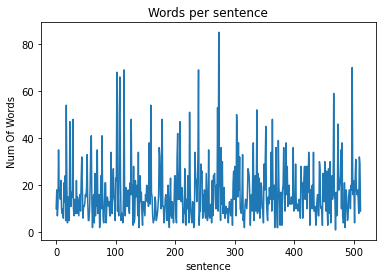

In [21]:
import matplotlib.pyplot as plt
l = df3.index
plt.plot(l, words)                                             
plt.xlabel('sentence')
plt.ylabel('Num Of Words')
plt.xticks()
plt.title('Words per sentence')
plt.yticks()
plt.style.use('default')
plt.show()

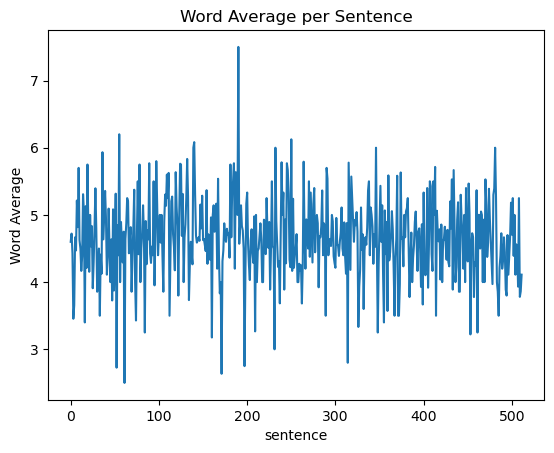

In [22]:
l2 = df3.index
plt.plot(l2, word_avg)                                             
plt.xlabel('sentence')
plt.ylabel('Word Average')
plt.xticks()
plt.title('Word Average per Sentence')
plt.yticks()
plt.style.use('default')
plt.show()

In [23]:
df3.to_csv('sentences_final_col.csv', index = False, encoding = 'utf-8-sig')

In [24]:
# from BguCorpusReader import BguCorpusReader
# c = BguCorpusReader()
# tagged_words = c.tagged_words()
# for i in range(6):
#     w,t = tagged_words[i]
#     print(t.getRaw())
#     print(t.getBguTag())
#     print(t.getPosTag())


In [25]:
df3['sentence'][1]

'חשוב להתייצב בשירות התעסוקה בסמוך להפסקת העבודה גם אם הפסקת לעבוד מרצונך, כדי לממש את זכאותך לדמי אבטלה.'

In [26]:
import requests
r = requests.get('http://lindat.mff.cuni.cz/services/udpipe/api/process?tokenizer&tagger&parser&data=לשם הבהרה, מאפרה היא כלי המיועד לשמש להשלכת אפר ושיירי מוצרי עישון לתוכו.')
r_dict = r.json()
#word_id = r_dict['result']
word_id = r_dict['result']
print('RESULT:\n', word_id)

spl = word_id.split()

NOUN = 0
VERB = 0
ADV = 0
AUX = 0
ADJ = 0
ADP = 0
PUNCT = 0

for w in range(len(spl)):
    if spl[w] == "NOUN":
        NOUN=NOUN+1;
    if spl[w] == "VERB":
        VERB=VERB+1;
    if spl[w] == "ADV":
        ADV=ADV+1;
    if spl[w] == "AUX":
        AUX=AUX+1;
    if spl[w] == "ADJ":
        ADJ=ADJ+1;
    if spl[w] == "ADP":
        ADP=ADP+1;
    if spl[w] == "PUNCT":
        PUNCT=PUNCT+1;
        
print(NOUN)
print(VERB)
print(ADV)
print(AUX)
print(ADJ)
print(ADP)
print(PUNCT)

RESULT:
 # generator = UDPipe 2, https://lindat.mff.cuni.cz/services/udpipe
# udpipe_model = czech-pdt-ud-2.6-200830
# udpipe_model_licence = CC BY-NC-SA
# newdoc
# newpar
# sent_id = 1
# text = לשם הבהרה, מאפרה היא כלי המיועד לשמש להשלכת אפר ושיירי מוצרי עישון לתוכו.
1	לשם	לשם	ADP	RR--2----------	AdpType=Prep|Case=Gen	2	case	_	_
2	הבהרה	הבהרה	NOUN	NNFS2-----A----	Case=Gen|Gender=Fem|Number=Sing|Polarity=Pos	6	obl	_	SpaceAfter=No
3	,	,	PUNCT	Z:-------------	_	2	punct	_	_
4	מאפרה	מאפרה	NOUN	NNIS1-----A----	Animacy=Inan|Foreign=Yes|Gender=Masc|Polarity=Pos	6	nmod	_	_
5	היא	היא	AUX	VB-S---3P-AA---	Mood=Ind|Number=Sing|Person=3|Polarity=Pos|Tense=Pres|VerbForm=Fin|Voice=Act	6	cop	_	_
6	כלי	כלי	NOUN	NNIS1-----A----	Animacy=Inan|Foreign=Yes|Gender=Masc|Polarity=Pos	0	root	_	_
7	המיועד	המיועד	ADJ	AAIS1----1A----	Degree=Pos|Foreign=Yes|Polarity=Pos	6	amod	_	_
8	לשמש	לשמש	VERB	Vf--------A----	Polarity=Pos|VerbForm=Inf	7	flat:foreign	_	_
9	להשלכת	להשלכת	NOUN	Vf--------A----	Degree=Pos|Foreign=Ye